In [1]:
import tensorflow as tf
import os
import cv2 
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

RuntimeError: ignored

In [2]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/input_data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [4]:
len(os.listdir('/content/drive/MyDrive/Colab Notebooks/input_data/sad'))

522

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/more-sad-data2.zip
Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/more-sad-data.zip
Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/vector17.svg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/vector16.svg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/vector15.svg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/vector14.svg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/vector13.svg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/vector10.svg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/vector12.svg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/vector11.svg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/input_data/sad/vector9.svg
Image not i

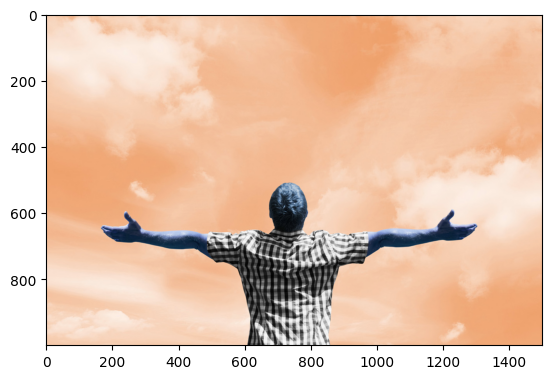

In [ ]:
# img = cv2.imread(os.path.join(data_dir, "happy", 'what-makes-people-happy1.jpg'))
# plt.imshow(img)
# 

In [5]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 916 files belonging to 2 classes.


In [ ]:
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()

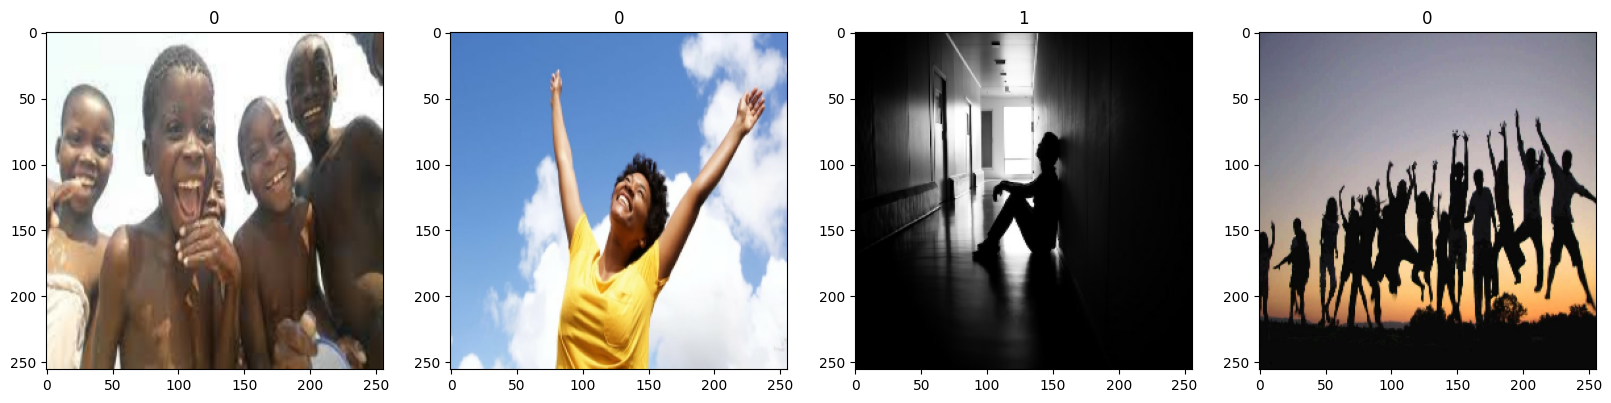

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

In [6]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
batch2 = data.as_numpy_iterator().next()
batch2[0].max()

1.0

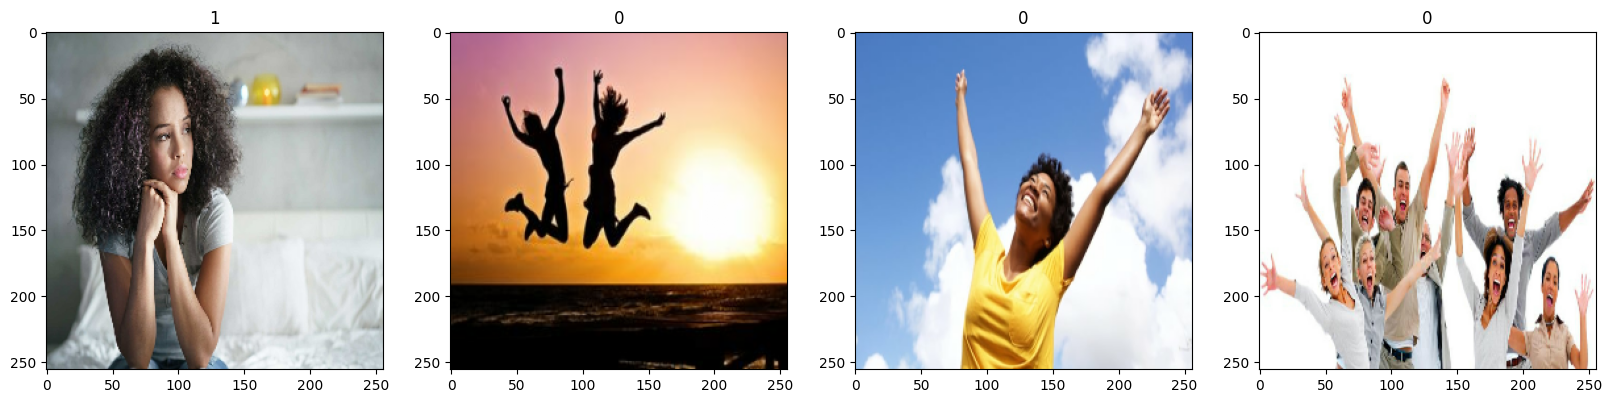

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch2[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch2[1][idx])

In [7]:
len(data)

29

In [9]:

# we need to split different data sets into data partitions, in our case len(data) = 6 partitions
train_size = int(len(data)*.7)
# val_size = int(len(data)*.2)
# test_size = int(len(data)*.1) + 1
train_size

20

In [10]:
val_size = int(len(data)*.2)
val_size

5

In [12]:
test_size = int(len(data)*.1) + 2
test_size

4

In [13]:
train_size + val_size + test_size == len(data)

True

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep learning

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [20]:
log_dir = "/content/drive/MyDrive/Colab Notebooks/log"

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [22]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
20/20 [==============================] - 198s 7s/step - loss: 0.6750 - accuracy: 0.6734 - val_loss: 0.3575 - val_accuracy: 0.8313
Epoch 2/20
20/20 [==============================] - 12s 529ms/step - loss: 0.4177 - accuracy: 0.8203 - val_loss: 0.4358 - val_accuracy: 0.8000
Epoch 3/20
20/20 [==============================] - 12s 477ms/step - loss: 0.3821 - accuracy: 0.8281 - val_loss: 0.2995 - val_accuracy: 0.8875
Epoch 4/20
20/20 [==============================] - 12s 518ms/step - loss: 0.3301 - accuracy: 0.8547 - val_loss: 0.3446 - val_accuracy: 0.8750
Epoch 5/20
20/20 [==============================] - 12s 528ms/step - loss: 0.3505 - accuracy: 0.8406 - val_loss: 0.2991 - val_accuracy: 0.8750
Epoch 6/20
20/20 [==============================] - 13s 537ms/step - loss: 0.2539 - accuracy: 0.9094 - val_loss: 0.3604 - val_accuracy: 0.8625
Epoch 7/20
20/20 [==============================] - 13s 540ms/step - loss: 0.2488 - accuracy: 0.8984 - val_loss: 0.2381 - val_accuracy: 0.9062
E

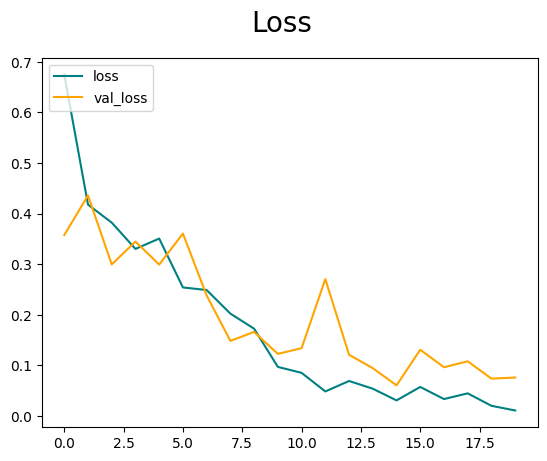

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

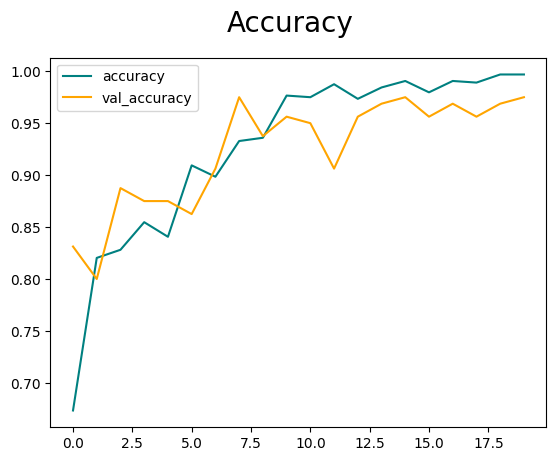

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

In [25]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [26]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 359ms/step


In [28]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9836066, shape=(), dtype=float32) tf.Tensor(0.95238096, shape=(), dtype=float32) tf.Tensor(0.9655172, shape=(), dtype=float32)


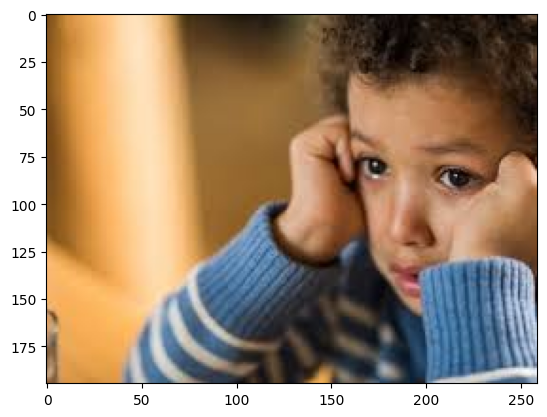

In [37]:
img = cv2.imread(os.path.join(data_dir, "sad", 'sad-tst.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

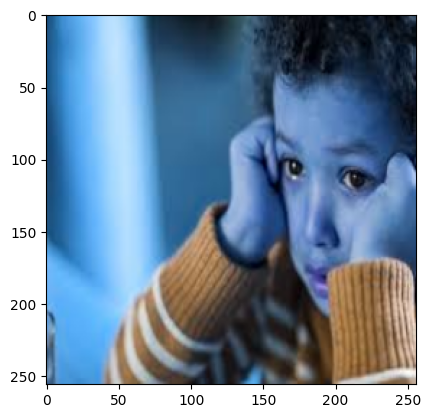

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 115ms/step


array([[0.94354653]], dtype=float32)

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 19ms/step


array([[0.94354653]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# save model & reuse

In [42]:
# init imports and model
import tensorflow as tf
import os
import cv2 
import numpy as np
from tensorflow.keras.models import load_model

data_dir = '/content/drive/MyDrive/Colab Notebooks/input_data'
models_dir = 'drive/MyDrive/Colab Notebooks/models'

In [43]:
model.save(os.path.join(models_dir,'imageclassifier-happy-sad-model-v2.h5'))

In [44]:
reused_model = load_model(os.path.join(models_dir,'imageclassifier-happy-sad-model-v2.h5'))

## Provide new image

In [48]:
img_raw = cv2.imread(os.path.join(data_dir, "happy", 'happydog.jpg'))
img_resized = tf.image.resize(img_raw, (256,256))

In [49]:
# reused_model = load_model(os.path.join(models_dir,'imageclassifier-happy-sad-model-v1.h5'))
pred_result = reused_model.predict(np.expand_dims(img_resized/255, 0))
print(pred_result)
if pred_result > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 [==============================] - 0s 22ms/step
[[0.01353149]]
Predicted class is Happy


In [ ]:
print(pred_result > 0.5)

[[False]]


Predicted class is Happy
